<a href="https://colab.research.google.com/github/jocker1854/Deep-Learning-Projects/blob/main/PlantDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alinedobrovsky/plant-disease-classification-merged-dataset")

print("Path to dataset files:", path)

100%|██████████| 17.3G/17.3G [02:59<00:00, 103MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/versions/1


In [3]:
ls /root/.cache/kagglehub/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/versions/1/Apple__black_rot

'0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
'00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'
'0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG'
'0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE.S 3079.JPG'
'01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG'
'02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG'
'02186b4f-a9e1-4d19-ae3d-6cfb0f4b106a___JR_FrgE.S 2828.JPG'
'02859ed3-f56a-4315-82a5-c1cb72717225___JR_FrgE.S 8584.JPG'
'028d1f49-303d-46b6-ae2b-50862fab78ca___JR_FrgE.S 2748.JPG'
'032cf235-07ff-478f-b347-d55c07835bc5___JR_FrgE.S 8778.JPG'
'033b1492-d5cf-4de7-a195-941f7780e092___JR_FrgE.S 8710.JPG'
'03fd7154-2e33-4fb6-999d-bfc3a3f467fe___JR_FrgE.S 8681.JPG'
'04de1246-ecfa-4d2c-bc2d-16b81b0bd364___JR_FrgE.S 2970.JPG'
'04e74a0c-bda4-4e06-aeab-ec24b1007994___JR_FrgE.S 8782.JPG'
'05421496-3901-424d-b44a-1be1f2734cf1___JR_FrgE.S 3005.JPG'
'057c985f-2a00-40fe-b48f-590aabd3babe___JR_FrgE.S 3015.JPG'
'05fb01a0-fd64-4b3d-a512-c0bda181811e___

In [ ]:
path = '/root/.cache/kagglehub/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/versions/1'

In [9]:
import os
import shutil
import random

# Configuration
source_dir = '/root/.cache/kagglehub/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/versions/1/Apple__black_rot'  # folder containing only one class
output_dir = 'split_dataset'
class_name = 'Apple__black_rot'  # name to keep in train/val folders
split_ratio = 0.8  # 80% train, 20% val
random.seed(42)  # for reproducibility

# Get all image files
images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
random.shuffle(images)

# Split
split_index = int(len(images) * split_ratio)
train_images = images[:split_index]
val_images = images[split_index:]

# Create output directories
for split in ['train', 'val']:
    split_class_dir = os.path.join(output_dir, split, class_name)
    os.makedirs(split_class_dir, exist_ok=True)

# Copy images
for img in train_images:
    shutil.copy2(os.path.join(source_dir, img), os.path.join(output_dir, 'train', class_name, img))

for img in val_images:
    shutil.copy2(os.path.join(source_dir, img), os.path.join(output_dir, 'val', class_name, img))

print(f"Split complete. Train: {len(train_images)} images, Val: {len(val_images)} images.")


Split complete. Train: 496 images, Val: 125 images.


In [12]:
cd ..

/content


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

# Data transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load only your class
dataset = datasets.ImageFolder('split_dataset/train', transform=transform)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Simple autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*128*3, 512),
            nn.ReLU(),
            nn.Linear(512, 128)
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 128*128*3),
            nn.Sigmoid(),
            nn.Unflatten(1, (3, 128, 128))
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x





Epoch [1/10], Loss: 0.0385
Epoch [2/10], Loss: 0.0254
Epoch [3/10], Loss: 0.0245
Epoch [4/10], Loss: 0.0227
Epoch [5/10], Loss: 0.0206
Epoch [6/10], Loss: 0.0199
Epoch [7/10], Loss: 0.0194
Epoch [8/10], Loss: 0.0189
Epoch [9/10], Loss: 0.0180
Epoch [10/10], Loss: 0.0174


In [ ]:
# Model, loss, optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [16]:
# Training loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, _ in loader:
        outputs = model(images)
        loss = criterion(outputs, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/10], Loss: {total_loss/len(loader):.4f}")

Epoch [1/10], Loss: 0.0168
Epoch [2/10], Loss: 0.0163
Epoch [3/10], Loss: 0.0160
Epoch [4/10], Loss: 0.0154
Epoch [5/10], Loss: 0.0149
Epoch [6/10], Loss: 0.0148
Epoch [7/10], Loss: 0.0146
Epoch [8/10], Loss: 0.0142
Epoch [9/10], Loss: 0.0138
Epoch [10/10], Loss: 0.0135


Reconstruction Loss: 0.0195
✅ Normal image


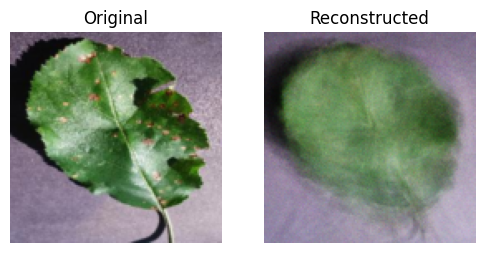

In [18]:
import matplotlib.pyplot as plt

# Pick a single training image
train_image, _ = dataset[4]
input_image = train_image.unsqueeze(0)  # Add batch dimension

# Set model to eval mode
model.eval()
with torch.no_grad():
    reconstructed = model(input_image)
    loss = criterion(reconstructed, input_image)
    print(f"Reconstruction Loss: {loss.item():.4f}")

    # Threshold — define a threshold based on your training loss distribution
    threshold = 0.02  # adjust this based on your own experiment
    if loss.item() > threshold:
        print("❌ Anomaly detected")
    else:
        print("✅ Normal image")

    # Show original and reconstructed images
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(input_image.squeeze().permute(1, 2, 0))
    axs[0].set_title("Original")
    axs[1].imshow(reconstructed.squeeze().permute(1, 2, 0))
    axs[1].set_title("Reconstructed")
    for ax in axs:
        ax.axis('off')
    plt.show()


In [19]:
import os
import shutil
import random

# Configuration
source_dir = path  # root directory containing class folders
output_dir = "5_class_split_dataset"
num_classes = 5
train_ratio = 0.8
random.seed(42)

# Get first 5 class names
all_classes = sorted(os.listdir(source_dir))
selected_classes = all_classes[:num_classes]

# Split each class into train/val
for cls in selected_classes:
    class_path = os.path.join(source_dir, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)
    split = int(len(images) * train_ratio)
    train_imgs = images[:split]
    val_imgs = images[split:]

    for split_type, split_imgs in zip(["train", "val"], [train_imgs, val_imgs]):
        dest_dir = os.path.join(output_dir, split_type, cls)
        os.makedirs(dest_dir, exist_ok=True)
        for img in split_imgs:
            shutil.copy2(os.path.join(class_path, img), os.path.join(dest_dir, img))

print("✅ Split done for first 5 classes.")


✅ Split done for first 5 classes.


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset_path = '5_class_split_dataset'

# Load datasets
train_dataset = datasets.ImageFolder(f"{dataset_path}/train", transform=transform)
val_dataset = datasets.ImageFolder(f"{dataset_path}/val", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Model: Pretrained ResNet18
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)  # 5 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)




/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
# Training loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for batch, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        if batch % 8 == 0:
            print(f"Epoch {epoch+1}, Batch {batch+1}/{len(train_loader)}, Loss: {loss.item():.4f}")

Epoch 1, Batch 1/96, Loss: 0.1882
Epoch 1, Batch 9/96, Loss: 0.0973
Epoch 1, Batch 17/96, Loss: 0.1446
Epoch 1, Batch 25/96, Loss: 0.0664
Epoch 1, Batch 33/96, Loss: 0.0845
Epoch 1, Batch 41/96, Loss: 0.0277
Epoch 1, Batch 49/96, Loss: 0.0256
Epoch 1, Batch 57/96, Loss: 0.0311
Epoch 1, Batch 65/96, Loss: 0.1242
Epoch 1, Batch 73/96, Loss: 0.0396
Epoch 1, Batch 81/96, Loss: 0.2395
Epoch 1, Batch 89/96, Loss: 0.0151
Epoch 2, Batch 1/96, Loss: 0.0178
Epoch 2, Batch 9/96, Loss: 0.0395
Epoch 2, Batch 17/96, Loss: 0.0429
Epoch 2, Batch 25/96, Loss: 0.0071
Epoch 2, Batch 33/96, Loss: 0.0270
Epoch 2, Batch 41/96, Loss: 0.0050
Epoch 2, Batch 49/96, Loss: 0.0103
Epoch 2, Batch 57/96, Loss: 0.0225
Epoch 2, Batch 65/96, Loss: 0.0031
Epoch 2, Batch 73/96, Loss: 0.0059
Epoch 2, Batch 81/96, Loss: 0.0422
Epoch 2, Batch 89/96, Loss: 0.0340
Epoch 3, Batch 1/96, Loss: 0.0107
Epoch 3, Batch 9/96, Loss: 0.0063
Epoch 3, Batch 17/96, Loss: 0.0036
Epoch 3, Batch 25/96, Loss: 0.0042
Epoch 3, Batch 33/96, Loss

In [25]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 99.35%


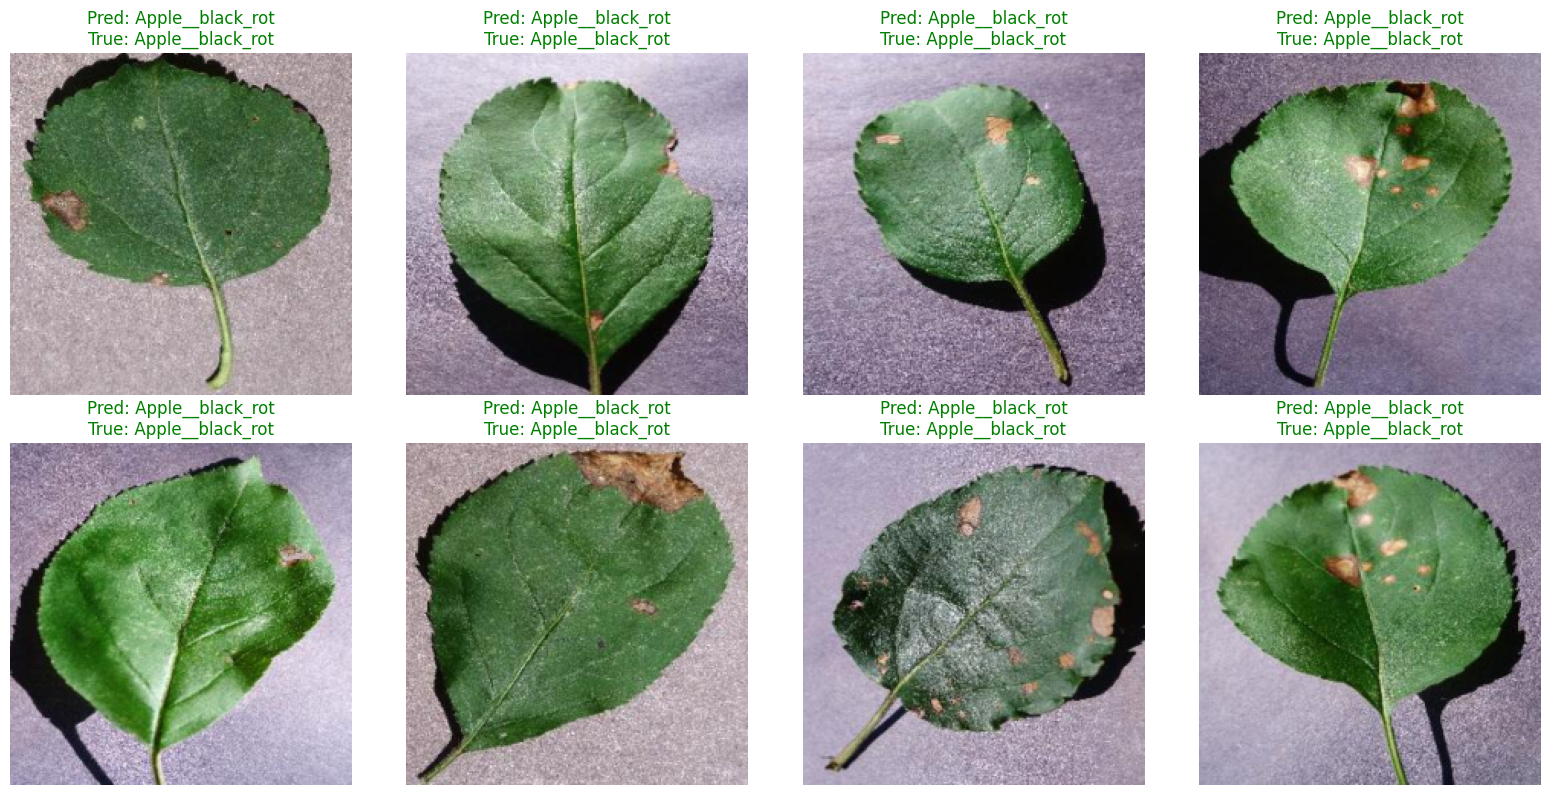

In [26]:
import matplotlib.pyplot as plt
import torchvision

# Get class names
class_names = train_dataset.classes

# Function to show images with predictions
def visualize_predictions(model, dataloader, num_images=8):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(16, 8))

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if images_shown == num_images:
                    return
                ax = plt.subplot(2, num_images // 2, images_shown + 1)
                img = inputs[i].cpu().permute(1, 2, 0).numpy()
                img = (img - img.min()) / (img.max() - img.min())  # normalize for display
                ax.imshow(img)
                ax.set_title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}",
                             color="green" if preds[i] == labels[i] else "red")
                ax.axis('off')
                images_shown += 1

# Call the function
visualize_predictions(model, val_loader)
plt.tight_layout()
plt.show()


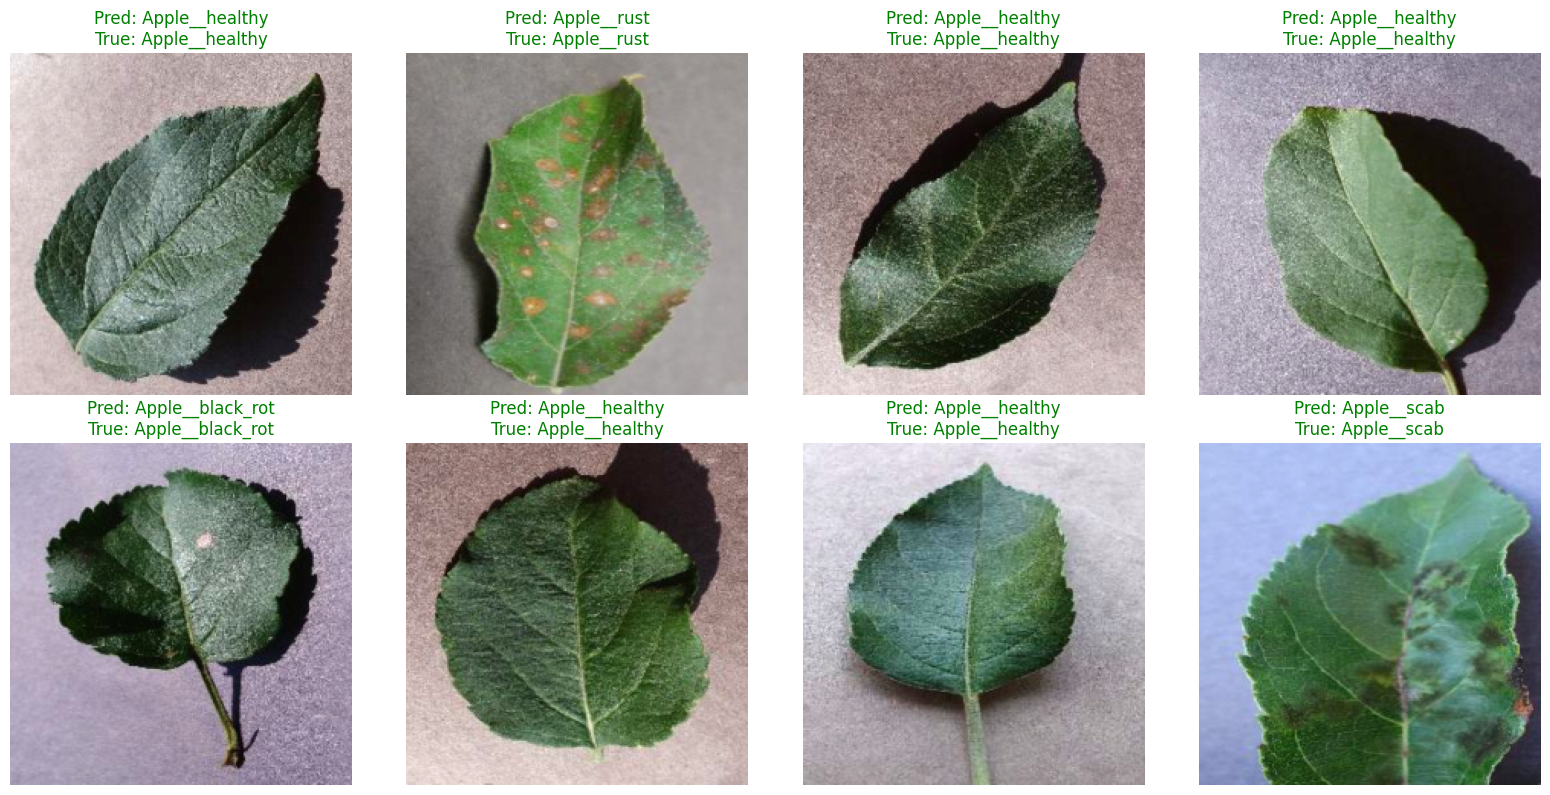

In [28]:
import random

def visualize_random_predictions(model, dataset, num_images=8):
    model.eval()
    indices = random.sample(range(len(dataset)), num_images)

    plt.figure(figsize=(16, 8))

    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        input_tensor = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            _, pred = torch.max(output, 1)

        ax = plt.subplot(2, num_images // 2, i + 1)
        img = image.permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
        ax.imshow(img)
        ax.set_title(f"Pred: {class_names[pred.item()]}\nTrue: {class_names[label]}",
                     color="green" if pred.item() == label else "red")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
visualize_random_predictions(model, val_dataset)
